**Análise exploratória dos dados**
A seguir analisaremos um dataset que pode ser acessado em https://dados.mg.gov.br/dataset/crimes-violentos 
Nele temos os dados sobre os crimes violentos ocorridos em MG entre os anos de 2018 e maio de 2023, vamos fazer algumas análises sobre a estrutura do dataset e após isso responderemos algumas perguntas baseadas nos dados.

**Nessa análise visamos responder as seguintes quetões:**
- Quais os crimes violentos mais praticados no estado de MG?
- Em quais municípios temos mais ocorrência desses crimes?
- Em qual mês ocorrem mais crimes?
- A ocorrência desses crimes têm aumentado ou diminuido ao longo dos anos?
- Qual o município mais violento?
- Qual o município menos violento?


In [2]:
#Iportando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import plotly.express as px

plt.style.use('ggplot')

In [6]:
#para evitar o erro de UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 5: invalid continuation byte
df = pd.read_csv("CSV/Banco_Crimes_Violentos _Atualizado_Maio_2023.csv", encoding="ISO-8859-1", sep = ';')

**Analisando a estrutura do dataset**

In [7]:
df.head()

,Registros,Natureza,Município,Cod IBGE,Mês,Ano,RISP,RISP Nova,RMBH
0,0,Estupro Consumado,ABADIA DOS DOURADOS,310010,1,2018,10,10,NÃO
1,0,Estupro Consumado,ABAETE,310020,1,2018,7,7,NÃO
2,0,Estupro Consumado,ABRE-CAMPO,310030,1,2018,12,12,NÃO
3,0,Estupro Consumado,ACAIACA,310040,1,2018,12,12,NÃO
4,0,Estupro Consumado,ACUCENA,310050,1,2018,12,12,NÃO


In [8]:
df.describe()

,Registros,Cod IBGE,Mês,Ano,RISP,RISP Nova
count,720785.000000,720785.000000,720785.000000,720785.000000,720785.000000,720785.000000
mean,0.412110,313697.720985,6.230769,2020.230769,10.658851,10.875733
std,13.032804,2070.887597,3.467519,1.576455,4.662307,4.721165
min,0.000000,310010.000000,1.000000,2018.000000,1.000000,1.000000
25%,0.000000,311950.000000,3.000000,2019.000000,7.000000,7.000000
50%,0.000000,313730.000000,6.000000,2020.000000,11.000000,12.000000
75%,0.000000,315490.000000,9.000000,2022.000000,14.000000,15.000000
max,2698.000000,317220.000000,12.000000,2023.000000,18.000000,19.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720785 entries, 0 to 720784
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Registros  720785 non-null  int64 
 1   Natureza   720785 non-null  object
 2   Município  720785 non-null  object
 3   Cod IBGE   720785 non-null  int64 
 4   Mês        720785 non-null  int64 
 5   Ano        720785 non-null  int64 
 6   RISP       720785 non-null  int64 
 7   RISP Nova  720785 non-null  int64 
 8   RMBH       720785 non-null  object
dtypes: int64(6), object(3)
memory usage: 49.5+ MB


**Significado de cada coluna:**

REGISTROS
Quantidade de ocorrências registradas.

NATUREZA
Natureza do crime cometido.

MUNICIPIO
Nome do município em que ocorreu o crime.

CÓDIGO MUNICÍPIO
Código do município.

MÊS
Mês em que ocorreu o fato.

ANO
Ano em que ocorreu o fato.

RISP
Número de identificação da Região Integrada de Segurança Pública.

RMBH
Se pertence ou não à Região Metropolitana de Belo Horizonte.

In [10]:
df.shape

(720785, 9)

In [11]:
#verifica se existe algum dado nulo
df.isnull().sum()

Registros    0
Natureza     0
Município    0
Cod IBGE     0
Mês          0
Ano          0
RISP         0
RISP Nova    0
RMBH         0
dtype: int64

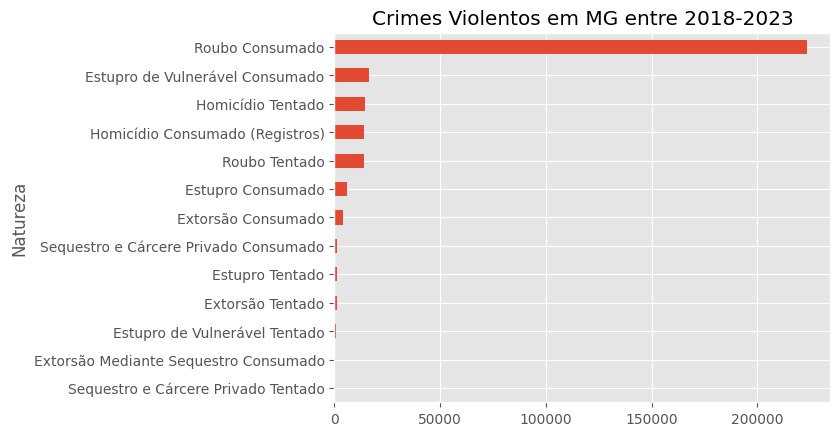

In [12]:
_= df.groupby("Natureza")["Registros"].sum().sort_values(ascending=True).plot.barh()
_= plt.title("Crimes Violentos em MG entre 2018-2023")


**Quais os crimes violentos mais praticados no estado de MG?**

Podemos observar que o crime mais cometido é o de roubo consumado seguido por estupro de vulnerável consumado.

In [13]:
df.groupby(["Município","Natureza"])["Registros"].sum().sort_values(ascending=False).to_frame().head(10)

,,Registros
Município,Natureza,
BELO HORIZONTE,Roubo Consumado,71208
CONTAGEM,Roubo Consumado,25431
UBERLANDIA,Roubo Consumado,11393
BETIM,Roubo Consumado,11313
RIBEIRAO DAS NEVES,Roubo Consumado,6161
UBERABA,Roubo Consumado,5552
MONTES CLAROS,Roubo Consumado,4218
JUIZ DE FORA,Roubo Consumado,4157
BELO HORIZONTE,Roubo Tentado,3899


** Em quais municípios temos mais ocorrência desses crimes?**

Aqui temos os 10 principais crimes agrupados por municipios, novamente podemos perceber que o roubo é o crime mais praticado, sendo BH o município mais afetado.

In [14]:
registros_por_mes = df.groupby(["Mês"])["Registros"].sum().reset_index()
registros_por_mes

,Mês,Registros
0,1,32314
1,2,29063
2,3,29910
3,4,27171
4,5,25454
5,6,21363
6,7,21515
7,8,21650
8,9,20941
9,10,22896


<Axes: xlabel='Mês', ylabel='Registros'>

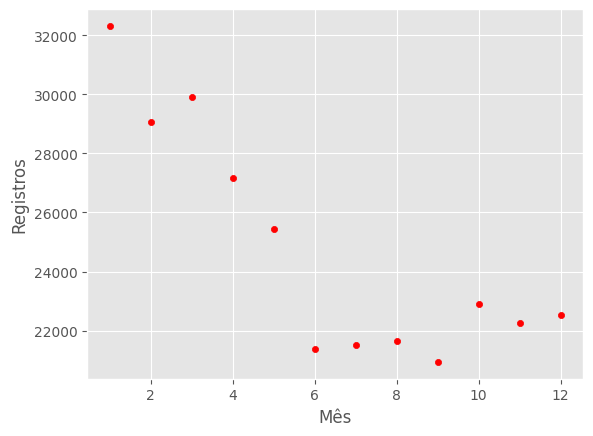

In [15]:
registros_por_mes.plot.scatter("Mês",'Registros', color = 'red')

**Em qual mês ocorrem mais crimes?**

Notamos um pico no mês de janeiro com um total de 32 314 registros e logo após uma queda

In [34]:
registros_por_ano = df.groupby(["Ano"])["Registros"].sum().reset_index()
registros_por_ano

,Ano,Registros
0,2018,95089
1,2019,69095
2,2020,46517
3,2021,37008
4,2022,36076
5,2023,13258


In [16]:
registros_por_mes.Registros.mean()

24753.583333333332

A média de registros por mês é de 24 753 mil

In [14]:
registros_por_ano = df.groupby(["Ano"])["Registros"].sum().to_frame()
registros_por_ano

,Registros
Ano,
2018,95089
2019,69095
2020,46517
2021,37008
2022,36076
2023,13258


<Axes: xlabel='Ano'>

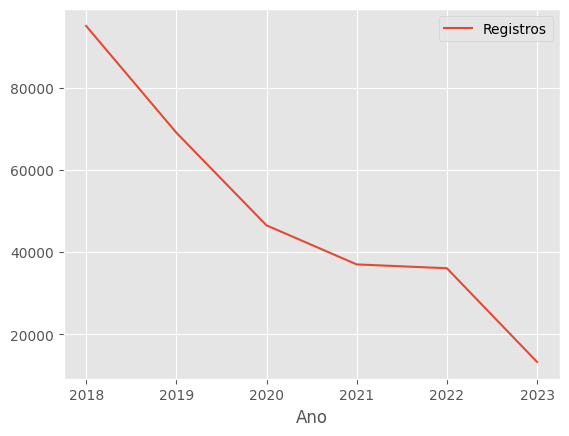

In [28]:
registros_por_ano.plot()

In [18]:
df.groupby(["Ano","Mês"])["Registros"].sum().to_frame()

Registros
Ano  Mês           
2018 1        10132
     2         8969
     3         8956
     4         8264
     5         7403
...             ...
2023 1         2844
     2         2448
     3         2902
     4         2468
     5         2596

[65 rows x 1 columns]

**A ocorrência desses crimes têm aumentado ou diminuido ao longo dos anos?**

Notamos uma queda brusca nos registros ano a ano, em 2018 foram registrados 95 089 casos, já em 2022 temos 36 076 , mesmo considerando que os dados de 2023 ainda não contém informações do ano todo, somente até o mês de maio, também notamos uma queda, em janeiro de 2018 foram registrados 10 132 casos já em janeiro de 2023 temos 2 844, demonstrando uma diminuição expressiva dos valores.

In [29]:
registros_por_ano.mean()

Registros    49507.166667
dtype: float64

A média de registros por ano é de 49 507, 

In [41]:
df.groupby("Município")["Registros"].sum().sort_values(ascending=False).to_frame()

,Registros
Município,
BELO HORIZONTE,83939
CONTAGEM,29003
UBERLANDIA,13571
BETIM,13223
RIBEIRAO DAS NEVES,7784
...,...
SERRA DA SAUDADE,2
GRUPIARA,1
CONCEICAO DAS PEDRAS,1


**Qual o municipio mais violento?**

BELO HORIZONTE com 83939 registros, algo que já era esperado, visto que se trata da capital do estado, que tem a maior população entre os municípios, segundo o censo de 2023 são 2.315.560 habitantes.

**Qual o municipio menos violento?**

SERRANOS que possui 0, o que também pode ser explicado devido a população, que neste caso é muito baixa, Serranos é 17º menor município de MG com apenas 1.990 habitantes.